# Flag 

1 null timestamp / null temperature
2 Temperature not in the range of [7,28]
3 Duplicate
4 Big changing

* For duplicate value, there are still a lot in **EastEnd 15ft**


In [ ]:
import numpy as np
import pandas as pd

#final = pd.read_csv('./data_newtemp_flag.csv')
final=pd.read_csv('./data (1).csv')
perc = [0.05,0.25,0.5,0.75,0.95] #
final.head()



In [2]:
final.loc[final.Depth==15].groupby(['Location'])['Temperature'].describe(percentiles = perc)

,count,mean,std,min,5%,25%,50%,75%,95%,max
Location,,,,,,,,,,
EagleRock,39367.0,17.312154,2.957861,10.24,13.495,15.127000,16.8440,18.9130,23.0124,29.185
EastEnd,86649.0,16.908847,18.614275,-32.20,11.210,14.756667,16.2200,18.2505,21.0200,151.700
LittleHarbor,32943.0,17.286602,3.632213,-32.20,11.800,14.815000,17.2195,19.9000,22.3000,41.300
WIES,127485.0,17.857638,15.421403,-32.20,13.775,15.200000,17.7000,19.7000,22.0145,151.700
WestEnd,27271.0,16.071552,3.341596,-32.20,12.300,14.500000,15.5000,18.3000,20.6000,28.300


In [3]:
final.loc[final.Depth==30].groupby(['Location'])['Temperature'].describe(percentiles = perc)

,count,mean,std,min,5%,25%,50%,75%,95%,max
Location,,,,,,,,,,
CatHarbor,1235.0,18.675311,2.587134,14.4405,16.298,17.0505,17.727,19.34475,23.481,41.74700
EagleRock,27977.0,17.166390,2.410010,10.9950,13.880,15.2940,16.800,18.84500,21.510,32.43000
EastEnd,54232.0,17.582587,23.435239,-32.2000,-25.900,15.0000,16.845,18.96000,22.445,151.70000
LittleHarbor,80888.0,17.693393,18.904581,-32.2000,-4.000,15.2000,17.180,19.20000,21.600,158.00000
WIES,41408.0,16.636062,2.313141,11.7550,13.527,14.5945,16.407,18.32250,20.725,29.35325
WestEnd,40392.0,16.138159,3.102566,-32.2000,13.400,14.7000,15.700,17.80000,19.900,70.10000


In [4]:
final.loc[final.Depth==40].groupby(['Location'])['Temperature'].describe(percentiles = perc)

,count,mean,std,min,5%,25%,50%,75%,95%,max
Location,,,,,,,,,,
CasinoPoint,21011.0,16.347151,1.959723,11.920,13.9400,14.940,15.735,17.555,20.215000,23.450
EagleRock,8003.0,13.508554,1.406268,9.670,11.6800,12.780,13.240,14.170,15.895000,24.490
WIES,27150.0,15.891314,2.283165,11.304,12.8925,14.055,15.522,17.356,20.115525,28.439


In [5]:
final.loc[final.Depth==60].groupby(['Location'])['Temperature'].describe(percentiles = perc)

,count,mean,std,min,5%,25%,50%,75%,95%,max
Location,,,,,,,,,,
EagleRock,39643.0,14.904930,2.128827,8.63,11.43,13.590,14.850,16.12175,18.671,25.83
EastEnd,57095.0,17.332284,3.530917,-32.20,13.59,14.840,16.700,19.34000,22.220,68.60
LittleHarbor,76160.0,16.664639,19.590906,-32.20,-25.90,14.780,16.022,17.70000,20.500,157.80
WIES,115787.0,14.652074,10.532726,-32.20,12.39,14.362,15.452,17.30000,20.000,69.60
WestEnd,28644.0,15.713923,2.104342,-32.20,12.90,14.400,15.400,17.10000,18.900,70.10


In [6]:
final.loc[final.Depth==100].groupby(['Location'])['Temperature'].describe(percentiles = perc)

,count,mean,std,min,5%,25%,50%,75%,95%,max
Location,,,,,,,,,,
WIES,122135.0,13.383837,11.088804,-32.2,10.06095,12.84125,14.1,15.5,19.0,68.7


There are some unreasonable temp at some Depth, therefore, 
I will rule out some impossible value by adding a new column 'Flag', and set them as True 
For normal values, it is False by default

If any of the following conditions is met, Flag=True
Temperature<=0
Temperature>100
Temperature is null
Timestamp is null

Flag 0 by default
1 - null timestamp/ null temperature
2 - abnormal temp (normal range 7-28C / 44-82F) 
3 - duplicate

Undefined 
......

In [8]:
final['Flag']=0

final.loc[pd.isnull(final.Timestamp),'Flag']=1
final.loc[pd.isnull(final.Temperature),'Flag']=1
final.loc[final.Temperature<7,'Flag']=2
final.loc[final.Temperature>28,'Flag']=2
# np.where(pd.isnull(final))
# the fair water temp is 10-25 (50-80 in F)


## There are some repeated Timestamps in several places


- WIES 15ft
'1992-08-13 23:55:00' - ‘1992-09-06 23:55:00’ (most of days, but not every)

        Depth	Latitude	Location	Longitude	Temperature	Timestamp	Flag	new_temp
936943	15.0	33.444328	WIES	-118.485208	21.4	1992-08-31 23:35:00	False	21.4
936944	15.0	33.444328	WIES	-118.485208	21.3	1992-08-31 23:45:00	False	21.3
936945	15.0	33.444328	WIES	-118.485208	21.3	1992-08-31 23:55:00	False	21.3 <<
936946	15.0	33.444328	WIES	-118.485208	21.3	1992-09-01 23:55:00	True	21.3 << // mark this flag as True
936947	15.0	33.444328	WIES	-118.485208	21.3	1992-09-01 00:05:00	False	21.3

- LittleHarbor 60ft
'1993-07-12 23:36:00' - '1993-08-18 23:36:00' (most of days, but not every)
- LittleHarbor 15ft
'1993-07-12 23:54:00' - '1993-08-18 23:54:00'

- WestEnd 60ft
'1993-10-27 23:45:00' - '1993-11-02'
- WestEnd 30ft
'1993-10-27 23:48:00' - '1993-11-02'

### EagleRock,CasinoPoint,CatHarbor look fine

## EastEnd
EastEnd 15ft, 30ft, 60ft have a lot of duplicate value 
and they don't look like what happen above

###

In [94]:
def dealwithDuplicates(final,loca,dep):
    temp = final.loc[(final.Location==loca)&(final.Depth==dep)].groupby(['Timestamp']).groups
    duplicated_timestamp=[k for k,v in temp.items() if len(v)>1]
    for i in duplicated_timestamp:
        target = final.loc[(final.Location==loca)&(final.Depth==dep)&(final.Timestamp==i)]
        if target.shape[0]==2:
            final.loc[target.index[0],'Flag'] = 3
        else:
            print(loca,dep,i)

In [95]:
#dealwithDuplicates(final,'WIES',15)
#dealwithDuplicates(final,'LittleHarbor',60)
#dealwithDuplicates(final,'LittleHarbor',15)
#dealwithDuplicates(final,'WestEnd',30)  # 1993-11-06 23:48:00
#dealwithDuplicates(final,'WestEnd',60)  # 1993-11-03 23:45:00
dealwithDuplicates(final,'EastEnd',15)  # 1995-11-24 23:21:00 probably need more
dealwithDuplicates(final,'EastEnd',30)  # 1995-11-24 23:04:00 probably need more
dealwithDuplicates(final,'EastEnd',60)  # 1995-11-19 23:08:00



EastEnd 15 2004-07-14 00:00:00
EastEnd 15 2004-07-14 01:00:00
EastEnd 15 2004-07-14 02:00:00
EastEnd 15 2004-07-14 03:00:00
EastEnd 15 2004-07-14 04:00:00
EastEnd 15 2004-07-14 05:00:00
EastEnd 15 2004-07-14 06:00:00
EastEnd 15 2004-07-14 07:00:00
EastEnd 15 2004-07-14 08:00:00
EastEnd 15 2004-07-14 09:00:00
EastEnd 15 2004-07-14 10:00:00
EastEnd 15 2004-07-14 11:00:00
EastEnd 15 2004-07-14 12:00:00
EastEnd 15 2004-07-14 13:00:00
EastEnd 15 2004-07-14 14:00:00
EastEnd 15 2004-07-14 15:00:00
EastEnd 15 2004-07-14 16:00:00
EastEnd 15 2004-07-14 17:00:00
EastEnd 15 2004-07-14 18:00:00
EastEnd 15 2004-07-14 19:00:00
EastEnd 15 2004-07-14 20:00:00
EastEnd 15 2004-07-14 21:00:00
EastEnd 15 2004-07-14 22:00:00
EastEnd 15 2004-07-14 23:00:00
EastEnd 15 2004-08-14 00:00:00
EastEnd 15 2004-08-14 01:00:00
EastEnd 15 2004-08-14 02:00:00
EastEnd 15 2004-08-14 03:00:00
EastEnd 15 2004-08-14 04:00:00
EastEnd 15 2004-08-14 05:00:00
EastEnd 15 2004-08-14 06:00:00
EastEnd 15 2004-08-14 07:00:00
EastEnd 

EastEnd 15 2005-06-14 05:00:00
EastEnd 15 2005-06-14 06:00:00
EastEnd 15 2005-06-14 07:00:00
EastEnd 15 2005-06-14 08:00:00
EastEnd 15 2005-06-14 09:00:00
EastEnd 15 2005-06-14 10:00:00
EastEnd 15 2005-06-14 11:00:00
EastEnd 15 2005-06-14 12:00:00
EastEnd 15 2005-06-14 13:00:00
EastEnd 15 2005-06-14 14:00:00
EastEnd 15 2005-06-14 15:00:00
EastEnd 15 2005-06-14 16:00:00
EastEnd 15 2005-06-14 17:00:00
EastEnd 15 2005-06-14 18:00:00
EastEnd 15 2005-06-14 19:00:00
EastEnd 15 2005-06-14 20:00:00
EastEnd 15 2005-06-14 21:00:00
EastEnd 15 2005-06-14 22:00:00
EastEnd 15 2005-06-14 23:00:00
EastEnd 15 2005-07-14 00:00:00
EastEnd 15 2005-07-14 01:00:00
EastEnd 15 2005-07-14 02:00:00
EastEnd 15 2005-07-14 03:00:00
EastEnd 15 2005-07-14 04:00:00
EastEnd 15 2005-07-14 05:00:00
EastEnd 15 2005-07-14 06:00:00
EastEnd 15 2005-07-14 07:00:00
EastEnd 15 2005-07-14 08:00:00
EastEnd 15 2005-07-14 09:00:00
EastEnd 15 2005-07-14 10:00:00
EastEnd 15 2005-07-14 11:00:00
EastEnd 15 2005-07-14 12:00:00
EastEnd 

EastEnd 15 2006-05-14 06:00:00
EastEnd 15 2006-05-14 07:00:00
EastEnd 15 2006-05-14 08:00:00
EastEnd 15 2006-05-14 09:00:00
EastEnd 15 2006-05-14 10:00:00
EastEnd 15 2006-05-14 11:00:00
EastEnd 15 2006-05-14 12:00:00
EastEnd 15 2006-05-14 13:00:00
EastEnd 15 2006-05-14 14:00:00
EastEnd 15 2006-05-14 15:00:00
EastEnd 15 2006-05-14 16:00:00
EastEnd 15 2006-05-14 17:00:00
EastEnd 15 2006-05-14 18:00:00
EastEnd 15 2006-05-14 19:00:00
EastEnd 15 2006-05-14 20:00:00
EastEnd 15 2006-05-14 21:00:00
EastEnd 15 2006-05-14 22:00:00
EastEnd 15 2006-05-14 23:00:00
EastEnd 15 2006-06-14 00:00:00
EastEnd 15 2006-06-14 01:00:00
EastEnd 15 2006-06-14 02:00:00
EastEnd 15 2006-06-14 03:00:00
EastEnd 15 2006-06-14 04:00:00
EastEnd 15 2006-06-14 05:00:00
EastEnd 15 2006-06-14 06:00:00
EastEnd 15 2006-06-14 07:00:00
EastEnd 15 2006-06-14 08:00:00
EastEnd 15 2006-06-14 09:00:00
EastEnd 15 2006-06-14 10:00:00
EastEnd 15 2006-06-14 11:00:00
EastEnd 15 2006-06-14 12:00:00
EastEnd 15 2006-06-14 13:00:00
EastEnd 

In [104]:
#just checking 
final.loc[(final.Location=='EastEnd')&(final.Depth==15)&(final.Timestamp=='2006-10-14 23:00:00')]

#final.iloc[158455:158480]
#final.iloc[225920:225930]

,Depth,Latitude,Location,Longitude,Temperature,Timestamp,Flag
168708,15.0,33.302807,EastEnd,-118.316184,16.603333,2006-10-14 23:00:00,0
174887,15.0,33.302807,EastEnd,-118.316184,NaN,2006-10-14 23:00:00,1
245560,15.0,33.302807,EastEnd,-118.316184,15.740000,2006-10-14 23:00:00,0


In [44]:
#to check if all duplicates are flaged
s= final[(final['Location']=='EastEnd')&(final.Depth==60)&(final.Flag==3)]['Timestamp'].duplicated()
timestamp_repeated = list(s[s==False].index) # Since in our data, the first one is extra, duplicated row (out of two mostly)
d = final.iloc[timestamp_repeated]['Flag']==3
print(d.sum())

172


Temperature between 44-82 could be in Fahrenheit, which will be 7-28 in C
Add a new column new_temp 
Convert the temperature between 44-82 to Celicus and put them into new_temp
set unfair temp value in to nan
** this is just a rough idea, since we are not sure if the value between 44-82 are weird value or Fahrenheit
These should be marked as abnormal temperature flag, too. 
If the flag will be removed when we confirm it is temperature in Fahrenheit.

In [105]:
final['new_temp']=final['Temperature']
final.loc[final.Temperature<=3,'new_temp']= np.nan
final.loc[final.Temperature>90,'new_temp']= np.nan
final.loc[(final.Temperature>=50)&(final.Temperature<=90),'new_temp'] = (final['Temperature']-32)*5/9


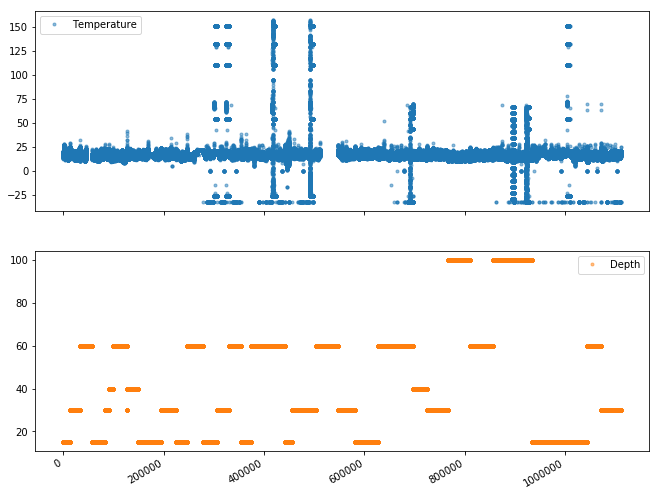

In [81]:
cols_plot=['Temperature','Depth','new_temp']
#final.loc[final.Flag==False]
axes = final[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

In [108]:
final['Reference']=''


,Depth,Latitude,Location,Longitude,Temperature,Timestamp,Flag,new_temp,Reference
0,15.0,33.4661,EagleRock,-118.5951,17.335,2004-06-26 07:00:00,0,17.335,
1,15.0,33.4661,EagleRock,-118.5951,18.215,2004-06-26 08:00:00,0,18.215,
2,15.0,33.4661,EagleRock,-118.5951,18.380,2004-06-26 09:00:00,0,18.380,
3,15.0,33.4661,EagleRock,-118.5951,18.460,2004-06-26 10:00:00,0,18.460,
4,15.0,33.4661,EagleRock,-118.5951,18.620,2004-06-26 11:00:00,0,18.620,


In [109]:
final.to_csv('data_flag.csv',index=False)